In [2]:
import sqlite3

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
# Wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
pwd

'C:\\Users\\czarnym\\Documents\\Development\\studia\\jupiter\\dataScience'

In [6]:
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [7]:
txtExtention = ".txt"

In [8]:
tables = ["Customers", "Orderlines", "Products", "Campaigns", "Orders"]

In [9]:
for table in tables:
    path = os.path.expanduser(table.lower() + txtExtention)
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    file.to_sql(table, dbConnection, if_exists="replace");

In [10]:
genderDF = pd.read_sql_query('''SELECT o.orderdate, c.gender, c.firstname from Orders o join Customers c on o.customerid = c.customerid 
                    join Campaigns cmp on o.campaignid = cmp.campaignid ''', dbConnection)

In [11]:
genderDF.head()

,orderdate,gender,firstname
0,2009-10-13 00:00:00,M,LOUIS
1,2009-10-13 00:00:00,M,ANTHONY
2,2011-06-02 00:00:00,None,MERRILL
3,2009-10-14 00:00:00,F,MARIA
4,2010-11-19 00:00:00,None,T.


In [12]:
genderDF["orderdate"] = genderDF["orderdate"].str[:-15].astype(np.int64)

In [13]:
genderDF = genderDF[genderDF["orderdate"] >= 2015]

In [14]:
genderDF = genderDF.set_index("orderdate")
genderDF = genderDF.dropna()
genderDF.sort_index()

,gender,firstname
orderdate,,
2015,M,PAUL
2015,M,STEVEN
2015,M,EDWARD
2015,M,ALLEN
2015,M,GREGORY
2015,F,LINDA
2015,F,WILMA
2015,F,SUZANNE
2015,M,RICHARD


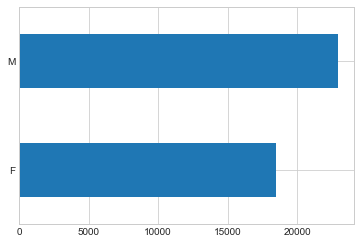

In [15]:
genderCounts = pd.value_counts(genderDF['gender'].values, sort=False)
genderCounts[:].plot(kind='barh', rot=0)

In [16]:
dataFrame = pd.read_sql_query('''select * from Orderlines
''', dbConnection)

In [17]:
genderDF 

,gender,firstname
orderdate,,
2015,M,PAUL
2015,M,TED
2015,F,KIMBERLY
2015,F,JANET
2015,M,ROBERT
2015,M,STEPHEN
2015,F,SUE
2015,M,MARK
2015,M,ANTHONY


In [18]:
dataFrame

,index,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,0,1010561,1006414,10834,2011-03-07 00:00:00,2011-03-08 00:00:00,18.00,1,18.00
1,1,1010562,1006541,11052,2011-01-19 00:00:00,2011-01-20 00:00:00,10.00,2,20.00
2,2,1010563,1006542,11070,2011-01-19 00:00:00,2011-01-20 00:00:00,19.12,1,19.12
3,3,1010564,1010154,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
4,4,1010565,1009110,11048,2009-11-11 00:00:00,2009-11-12 00:00:00,10.00,2,20.00
5,5,1010566,1009110,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,2,29.90
6,6,1010567,1008491,10816,2009-11-03 00:00:00,2009-11-04 00:00:00,175.00,1,175.00
7,7,1010568,1008492,11048,2009-11-10 00:00:00,2009-11-11 00:00:00,10.00,1,10.00
8,8,1010569,1010189,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
9,9,1010570,1008493,11196,2009-12-17 00:00:00,2009-12-18 00:00:00,0.00,1,0.00


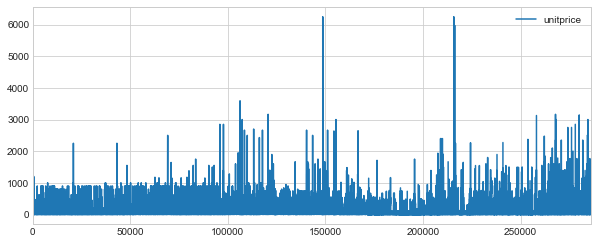

In [19]:
dataFrame['unitprice'].plot(legend=True,figsize=(10,4))

In [20]:
groupsDF = pd.read_sql_query('''select p.PRODUCTGROUPNAME, p.INSTOCKFLAG, ol.unitprice from Products p 
                              join Orderlines ol on p.productid = ol.productid''', dbConnection)
groupsDF = groupsDF.dropna()
groupsDF = groupsDF[groupsDF["PRODUCTGROUPNAME"] != "FREEBIE"]
groupsDF = groupsDF[groupsDF["unitprice"] > 0]                     
groupsDF.sort_values("unitprice", ascending=False)

,PRODUCTGROUPNAME,INSTOCKFLAG,unitprice
160805,ARTWORK,Y,6250.00
160804,ARTWORK,Y,6250.00
160803,ARTWORK,Y,5967.37
43663,BOOK,N,3592.00
160764,ARTWORK,Y,3165.00
160763,ARTWORK,Y,3165.00
160811,ARTWORK,Y,3145.00
160762,ARTWORK,Y,3127.00
160756,ARTWORK,Y,3000.00
160754,ARTWORK,Y,3000.00


In [21]:
groupsDF.groupby(["PRODUCTGROUPNAME"]).mean()

,unitprice
PRODUCTGROUPNAME,
APPAREL,21.515427
ARTWORK,170.229478
BOOK,20.207304
CALENDAR,22.463665
GAME,20.168615
OCCASION,23.117757
OTHER,38.081043


In [22]:
productQuery = '''
SELECT ol.billdate, ol.totalprice, o.city, p.PRODUCTGROUPNAME
FROM Orders o JOIN Orderlines ol ON o.orderid = ol.orderid 
JOIN Products p ON ol.productid = p.PRODUCTID
'''

In [34]:
gamesDF = pd.read_sql_query(productQuery, dbConnection)
gamesDF.head()

,billdate,totalprice,city,PRODUCTGROUPNAME
0,2009-11-12 00:00:00,175.00,NEWTON,ARTWORK
1,2009-11-26 00:00:00,10.00,NEWTON,ARTWORK
2,2009-10-23 00:00:00,5.00,NEWTON,OCCASION
3,2009-11-04 00:00:00,10.00,NEW ROCHELLE,ARTWORK
4,2011-06-06 00:00:00,17.61,MIAMI,OCCASION


In [35]:
gamesDF["year"] = gamesDF["billdate"].str[:-15].astype(np.int64)
gamesDF["billdate"] = gamesDF["billdate"].str[:-9]
gamesDF["billdate"] = pd.to_datetime(gamesDF["billdate"])
gamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 5 columns):
billdate            286017 non-null datetime64[ns]
totalprice          286017 non-null float64
city                285983 non-null object
PRODUCTGROUPNAME    286008 non-null object
year                286017 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 10.9+ MB


In [36]:
gamesDF = gamesDF[gamesDF["year"] == 2016]
gamesDF = gamesDF[gamesDF["city"] == "NEW YORK"]
gamesDF = gamesDF[gamesDF["PRODUCTGROUPNAME"] == "GAME"]
gamesDF = gamesDF.set_index("billdate")
gamesDF.head()

,totalprice,city,PRODUCTGROUPNAME,year
billdate,,,,
2016-01-05,7.44,NEW YORK,GAME,2016
2016-01-07,13.49,NEW YORK,GAME,2016
2016-01-15,44.95,NEW YORK,GAME,2016
2016-01-25,44.95,NEW YORK,GAME,2016
2016-02-01,44.95,NEW YORK,GAME,2016


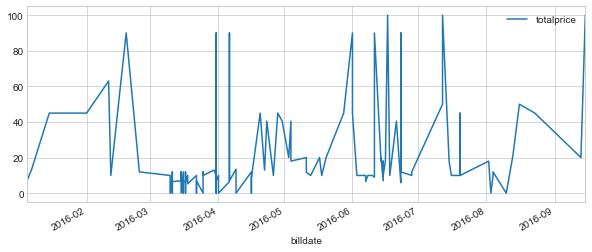

In [37]:
gamesDF['totalprice'].plot(legend=True,figsize=(10,4))

In [38]:
# Srednia ruchoma
movingAvarages = [7,30,60,90]

for avarage in movingAvarages:
    column_name = "MA for %s days" %(str(avarage))
    gamesDF[column_name]=gamesDF['totalprice'].rolling(window=avarage).mean()

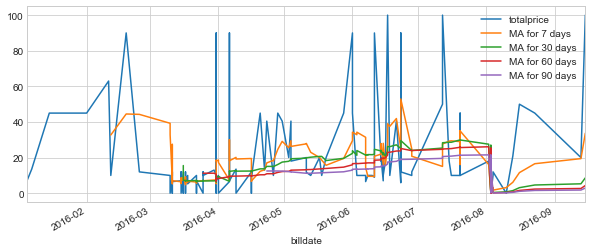

In [40]:
gamesDF[['totalprice','MA for 7 days','MA for 30 days','MA for 60 days','MA for 90 days']].plot(subplots=False,figsize=(10,4))

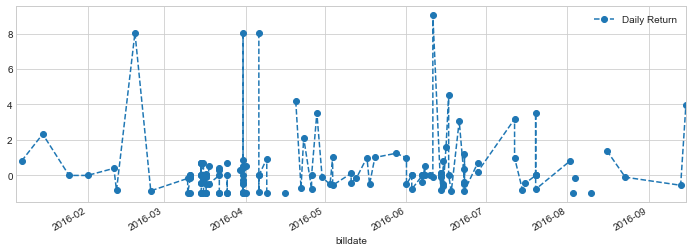

In [42]:
# pct_change - wyszukuje procentową zmianę dla każdego dnia
gamesDF['Daily Return'] = gamesDF['totalprice'].pct_change()
# Procentowy dzienny zwrot
gamesDF['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')